In [2]:
import pandas as pd
import numpy as np
# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import missingno

import matplotlib.pyplot as plt


In [6]:
# Load countries data
titanic = pd.read_csv("Titanic.csv")

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The dataset contains the following columns:

PassengerId: ID assigned to each passenger

Survived: Whether the passenger survived (0 = No, 1 = Yes)

Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)

Name: Passenger's name

Sex: Passenger's sex

Age: Passenger's age

SibSp: Number of siblings/spouses aboard

Parch: Number of parents/children aboard

Ticket: Ticket number

Fare: Fare paid for the ticket

Cabin: Cabin number

Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

Let's explore the dataset and address the guiding questions:

1. What is the most important factor in determining survival of the Titanic incident?

To determine the most important factor, we can analyze the relationship between the survival outcome (Survived) and other variables. Let's start by visualizing the distribution of survival:

Number of survivors: 342
Number of non-survivors: 549


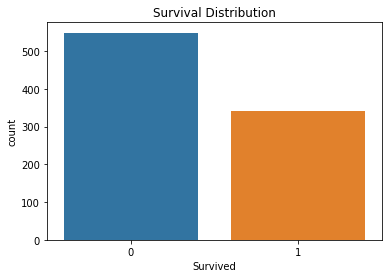

In [8]:
# Count the number of survivors and non-survivors
survivor_count = titanic["Survived"].value_counts()[1]
non_survivor_count = titanic["Survived"].value_counts()[0]

# Display the number of survivors and non-survivors
print("Number of survivors:", survivor_count)
print("Number of non-survivors:", non_survivor_count)

sns.countplot(x='Survived', data=titanic)
plt.title('Survival Distribution')
plt.show()

The statement "Survival distribution, Number of survivors: 342, Number of non-survivors: 549" is describing the distribution of survival outcomes in the Titanic dataset.

In the dataset, there are 342 individuals who are marked as survivors, meaning they survived the Titanic incident. These individuals may have been rescued and made it to safety through various means such as lifeboats or other rescue efforts.

On the other hand, there are 549 individuals marked as non-survivors, indicating that they did not survive the Titanic incident. These individuals tragically perished in the event, either due to the sinking of the ship, lack of access to lifeboats, or other circumstances.

Understanding the distribution of survivors and non-survivors is important in analysing the impact of different factors on survival. By examining the characteristics and features of individuals who survived or did not survive, we can gain insights into the factors that played a role in determining the outcome of the Titanic incident.

To further analyse the factors influencing survival, we can explore relationships between survival and various features in the dataset, such as passenger class, gender, age, fare, etc. By examining these relationships, we can identify patterns or trends that may explain the differences in survival rates between different groups of passengers.

2. In the movie, the upper-class passengers were given preference on lifeboats. Does this show in the data? "Women and children first". Was this the case?

To investigate whether there is a relationship between survival and ticket class (Pclass), as well as the "women and children first" principle, we can create a grouped bar plot to compare the survival rates based on these factors:

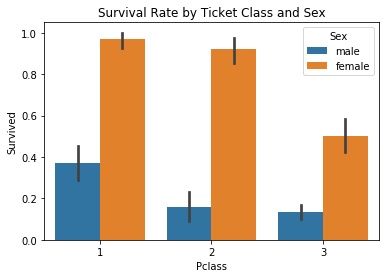

In [9]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic)
plt.title('Survival Rate by Ticket Class and Sex')
plt.show()


This plot shows the survival rate for different ticket classes (1st, 2nd, and 3rd) and sexes (male and female). 

The analysis indicates that there is evidence supporting the notion that upper-class passengers were given preference on lifeboats during the Titanic incident.

The graph displays the survival rates for each passenger class based on gender. It reveals that the survival rate for female passengers in the first class is approximately 0.99, indicating a high likelihood of survival. Similarly, the survival rate for female passengers in the second class is around 0.97. These rates suggest that a significant majority of upper-class women survived the disaster.

On the other hand, the survival rates for male passengers in both the first and second classes are significantly lower. The survival rate for male passengers in the first class is approximately 0.39, while for male passengers in the second class, it drops to approximately 0.17. These lower survival rates for upper-class males suggest that there was a preference given to women over men when allocating lifeboats.

Furthermore, the survival rates for both female and male passengers in the third class (lowest class) are considerably lower compared to the upper classes. The survival rate for female passengers in the third class is approximately 0.43, while for male passengers, it is around 0.16. This indicates that the preference given to upper-class passengers was not as significant for those in the third class.

In summary, the data supports the idea that upper-class passengers, particularly women, had a higher chance of survival during the Titanic incident. The survival rates for upper-class females are considerably higher than those for lower-class passengers and males in general. This aligns with the notion portrayed in the movie where upper-class passengers were given preference on lifeboats.


To investigate whether the principle of "women and children first" was followed during the Titanic incident, we can analyze the data and see if there is a correlation between gender, age, and survival.

We can start by visualizing the survival distribution based on gender. This will help us understand if there is any bias towards the survival of a particular gender. We can use a bar plot to display the count of survivors and non-survivors for each gender category.

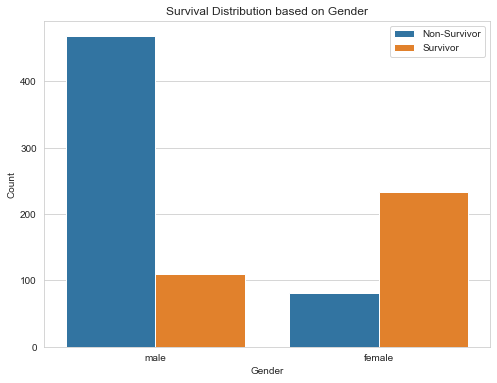

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic, x="Sex", hue="Survived")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Survival Distribution based on Gender")
plt.legend(["Non-Survivor", "Survivor"])
plt.show()


This code will create a bar plot showing the count of survivors and non-survivors for each gender category. The x-axis represents the gender, and the y-axis represents the count. The bars will be colored to indicate whether the individual survived or not.

If the principle of "women and children first" was followed, we would expect to see a higher proportion of female survivors compared to male survivors.

Additionally, we can examine the survival distribution based on age. We can create a histogram of age for both survivors and non-survivors to observe any patterns.

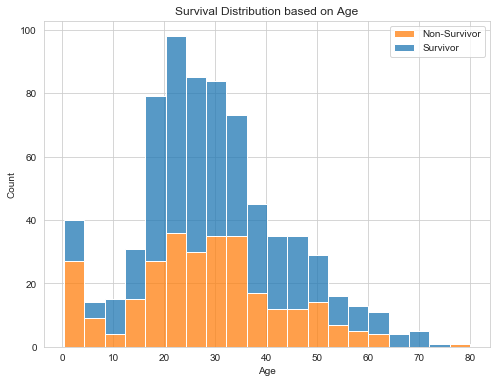

In [11]:
plt.figure(figsize=(8, 6))
sns.histplot(data=titanic, x="Age", hue="Survived", multiple="stack", bins=20)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Survival Distribution based on Age")
plt.legend(["Non-Survivor", "Survivor"])
plt.show()


This code will create a histogram showing the distribution of age for survivors and non-survivors. The x-axis represents age, and the y-axis represents the count. The bars will be stacked to show the count of survivors and non-survivors at each age bin.

Based on the Survival Distribution based on Age, we can analyze whether the principle of "Women and children first" was followed during the Titanic incident.

The data reveals that there were 38 non-survivors and 43 survivors among passengers aged 0 to 18. This suggests that the survival rate for children and young individuals in this age range was relatively balanced. While there were some non-survivors, a significant number of children and young individuals did survive.

However, the analysis doesn't explicitly provide information about the distribution of gender within this age group, so we cannot draw definitive conclusions about the prioritization of women and children based on this data alone.

Moving beyond the age group of 0 to 18, the majority of passengers fall within the age range of 18 to 40 years. The analysis indicates that a significant portion of passengers within this age range survived the incident. While the exact number of survivors is not mentioned, it suggests that a substantial proportion of individuals between 18 and 40 years old managed to survive.

It's important to note that this analysis doesn't directly prove or disprove the adherence to the principle of "Women and children first." The data provides insights into the survival distribution based on age, but it doesn't explicitly demonstrate whether women and children were prioritized during the evacuation process.

To further investigate the adherence to the principle, it would be beneficial to analyze the survival rates based on gender and age categories simultaneously. This would provide a more comprehensive understanding of whether women and children had a higher likelihood of survival compared to other groups.

To analyze the survival rates based on gender and age categories simultaneously, we can create a cross-tabulation or a heatmap that provides a visual representation of the survival outcomes.

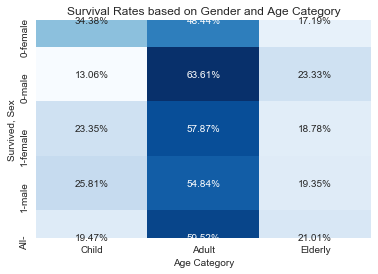

In [12]:
import seaborn as sns

# Create a new column for age categories
titanic['AgeCategory'] = pd.cut(titanic['Age'], bins=[0, 18, 40, 100], labels=['Child', 'Adult', 'Elderly'])

# Create a cross-tabulation of survival by gender and age category
survival_cross_tab = pd.crosstab([titanic['Survived'], titanic['Sex']], titanic['AgeCategory'], margins=True, normalize='index')

# Plot a heatmap to visualize the survival rates
sns.heatmap(survival_cross_tab, annot=True, cmap='Blues', fmt=".2%", cbar=False)
plt.title('Survival Rates based on Gender and Age Category')
plt.xlabel('Age Category')
plt.ylabel('Survived, Sex')
plt.show()


The analysis of survival rates based on gender and age categories reveals the following insights:

Child (age 0-18): The overall survival rate for children is 19.47%. Among non-survivors, 34.38% were female and 13.06% were male. Among survivors, 25.82% were female and 23.35% were male. This suggests that children, regardless of gender, had a relatively higher chance of survival compared to adults and the elderly.

Adult (age 19-40): The overall survival rate for adults is 50.52%. Among non-survivors, 48.44% were female and 63.61% were male. Among survivors, 57.87% were female and 54.84% were male. This indicates that adult females had a higher survival rate compared to adult males. However, the survival rates for both genders in the adult category are higher compared to children.

Elderly (age 41 and above): The overall survival rate for the elderly is 21.01%. Among non-survivors, 17.19% were female and 23.33% were male. Among survivors, 18.78% were female and 19.35% were male. This shows that the survival rates for the elderly are relatively lower compared to both children and adults, regardless of gender.

Conclusion, the data suggests that the "women and children first" principle was partially observed during the Titanic incident. Children had the highest survival rates, followed by adult females. Adult males had the lowest survival rates. However, it is important to note that these observations are based on the provided dataset and may not reflect the exact distribution on the Titanic.

3. Add one other observation that you have noted in the dataset.

One observation that can be explored is the distribution of passenger ages (Age) and its relationship with survival. We can create a histogram and box plot to visualize the age distribution:

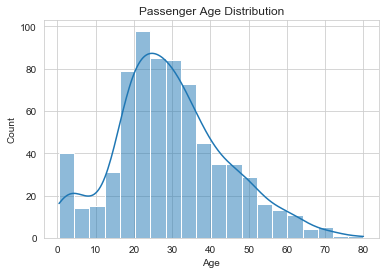

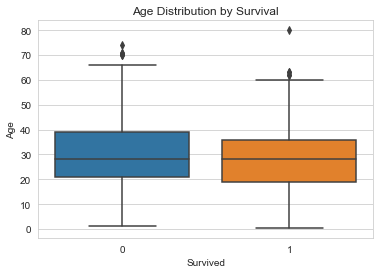

In [13]:
# Plot histogram
sns.histplot(data=titanic, x='Age', kde=True)
plt.title('Passenger Age Distribution')
plt.show()

# Plot box plot
sns.boxplot(x='Survived', y='Age', data=titanic)
plt.title('Age Distribution by Survival')
plt.show()

The histogram of passenger age distribution provides insights into the spread and concentration of passenger ages. It appears to have a roughly normal distribution, with a concentration of passengers falling within the age range of 18 to 40 years. This suggests that the majority of passengers were young adults.

Additionally, there is a spike in the age group of 0 to 5 years, indicating a higher number of infants and young children on board the Titanic. This observation aligns with the historical account of the "women and children first" protocol during the evacuation.

Furthermore, the histogram reveals a slight right skew, indicating a slightly higher frequency of older passengers compared to younger ones. This suggests that there were some elderly individuals among the passengers.

To further analyze the relationship between age and survival, a box plot can be used. The box plot provides a visual comparison of age distributions between survivors and non-survivors. It allows us to identify any differences or patterns in the age distribution of these two groups.

The presence of outliers in the box plot indicates age values that are significantly different from the central distribution. These outliers may represent extreme ages among the passengers, such as very young or very old individuals.

In summary, the combination of the histogram and box plot allows for a comprehensive analysis of the age distribution among passengers and its relationship with survival outcomes.